In [ ]:
# Trabalho 3

In [ ]:
# 1 - Modelagem

# a) O tabuleiro será representado por uma lista l de N elementos, onde cada elemento i de l representará uma coluna contendo
#    rainha, e o valor i representará a fileira na qual essa rainha está localizada.
#    Portanto, com essa modelagem, heverá exatamente uma rainha em cada coluna do tabuleiro, eliminando
#    assim, a necessidade de verificar ataques na vertical.
#    As fileiras e colunas serão indexadas de 0 a N-1.
#
#    Exemplo:   tabuleiro 4x4      l=[0,3,1,1]

In [ ]:
# 2 - Implementação Base

In [ ]:
# ------- imports -------
import random
import matplotlib.pyplot as plt
# ------- imports -------

In [ ]:
#a) Função que cria tabuleiros

# Criando q tabuleiros aleatórios de dimensão n
# Retorna a lista dos tabuleiros criados
def tabuleiros(n,q):
  tabList = []
  for i in range(q):
    tab = []
    for j in range(n):
      tab.append(int(random.random()*n)) #define aleatoriamente a posição da rainha
    tabList.append(tab)           #adiciona à lista de tabuleiros
  return tabList

In [ ]:
#b) Função todosVizinhos

# Recebe um tabuleiro
# Retorna todos os estados vizinhos
def todosVizinhos(tab):
  vizinhos = []
  for i in range(len(tab)): # iterador da coluna
    for j in range(len(tab)): # iterador da linha
      temp = tab.copy()
      if tab[i] != j :  #quando é igual, trata-se do próprio tabuleiro, e não de um vizinho
        temp[i] = j     #altera a posição da rainha na coluna i
        vizinhos.append(temp)
  return vizinhos


In [ ]:
#c) Função umVizinho

# Recebe um tabuleiro
# Retorna um estado vizinho deste tabuleiro
def umVizinho(tab):
  vizinho = tab.copy()
  coluna = int(random.random()*len(tab))
  linha = int(random.random()*len(tab))
  while linha == tab[coluna]:  #testa se a função não sorteou o próprio tabuleiro
    linha = int(random.random()*len(tab))
  vizinho[coluna] = linha
  return vizinho

#A função todosVizinhos poderia ter sido usada, mas não pareceu muito eficiente
# gerar todos os vizinhos para depois selecionar apenas um.

In [ ]:
#d) Função que calcula o numero de ataques

# Recebe um tabuleiro
# Retorna o numero de ataques entre as rainhas
def numeroAtaques(tab):
  num = 0
  for i in range(len(tab)):
    for j in range(i+1,len(tab)): # Só avalia colunas à direita
      k = j-i  #diferença entre as colunas i e j usada para avaliar ataque diagonal
      if tab[i]==tab[j] or tab[i]+k==tab[j] or  tab[i]-k==tab[j]:
        num += 1
  return num

In [ ]:
# Implementação do algoritmo genético
  #Os operadores estão definidos abaixo

TAMTAB = 8 # tamanho do tabuleiro



#probabilidades são passadas em intervalo de 0 a 1
def genetico(tampop,ngen,pcros,pmut,popIni=None,elitismo=False):

  #gera população inicial se ela não for passada como parâmetro
  if popIni == None or len(popIni) == 0:
    popIni = tabuleiros(TAMTAB,tampop)

  # avalia população inicial
  ava = avalia(popIni)
  melhor = 0
  sum = 0
  for i in range(tampop):
    if ava[i]>melhor:
      melhor = ava[i]
    sum += ava[i]

  # cria lista de melhores e médias para geração dos gráficos
  adapt = [melhor]
  med = [sum/tampop]

  # população intermediária
  popInt = popIni.copy()

  #para cada geração
  for i in range(ngen):
    #avalia tabuleiro
    ava = avalia(popInt)
    #elitismo
    index = 0
    elit = popInt[index]
    if elitismo:
      for i in range(tampop):
        if ava[i]>ava[index]:
          elit = popInt[i]
    #constrói população intermediária usando a roleta
    popInt = roleta(popInt, ava, tampop)
    #faz crossover
    popInt = crossover(popInt,pcros)
    #faz mutação
    popInt = mutacao(popInt,pmut)
    #continuação elitismo
    if elitismo:
      popInt[0] = elit
    #adiciona melhor indivíduo e média às listas
    melhor = 0
    sum = 0
    for i in range(tampop):
      if ava[i]>melhor:
        melhor = ava[i]
      sum += ava[i]
    adapt.append(melhor)
    med.append(sum/tampop)

  #plota os gráficos
  graphGenAdapt(ngen,adapt,med)

  # printando o melhor indivíduo da última geração
  index = 0
  avaUlt = avalia(popInt)
  melhorUlt = avaUlt[index]
  for i in range(tampop):
    if avaUlt[i]>melhorUlt:
      melhorUlt = avaUlt[i]
      index = i
  print("Melhor: ", popInt[index], "Adaptação = ", melhorUlt)





In [ ]:
# Função que avalia os tabuleiros e
# retorna lista com o valor de adaptação dos indivíduos em uma população

def avalia(tabs):
  adapt = []
  maxAtk = 0
  for i in range(TAMTAB): #faz o somatório para determinar ataques máximos
    maxAtk += i
  for i in range(len(tabs)):
    adapt.append(maxAtk - numeroAtaques(tabs[i])) # se não ocorrer ataques,
    # o valor é ótimo (maxAtk), valor minimo = 0 -> todas as rainhas se atacam
  return adapt

In [ ]:
# Função que constrói a roleta
  # Recebe a lista da população, suas avaliações(que funcionam como pesos) e seu tamanho,
  # retornando uma lista com os indivíduos escolhidos pela roleta,
  # respeitando os pesos das avaliações,
  # de forma que quem tiver uma avaliação menor, tem menos chances de ser escolhido

def roleta(pop, pesos, tampop):
  return random.choices(pop, weights=pesos, k=tampop)



In [ ]:
# Função que faz o crossover entre os indivíduos da população intermediária

def crossover(pop,pcros):
  # a lista é percorrida aos pares, então i pode ser a metade do comprimento da lista
  for i in range(int(len(pop)/2)):
    if random.random() < pcros:    #define se será feito crossover
      ia = 2*i
      ib = (2*i)+1
      temp1 = pop[ia].copy()
      temp2 = pop[ib].copy()
      corte = int(random.random()*TAMTAB)  #define o ponto de corte
      for j in range(corte,TAMTAB):
        temp1[j] = pop[ib][j]
        temp2[j] = pop[ia][j]
      pop[ia] = temp1
      pop[ib] = temp2
  return pop

In [ ]:
# Função que faz a mutação dos indivíduos da população inermediária

def mutacao(pop,pmut):
  for i in range(len(pop)):
    if random.random() < pmut:
      # a mutação é um movimento de alguma rainha (estado vizinho)
      pop[i] = umVizinho(pop[i])
  return pop

In [ ]:
# ------- gerando os gráficos -------

# Geração X Função de ataptação do melhor indivíduo e Adaptação média
def graphGenAdapt(ngen,adapt,med):

  # plota a linha de avaliação ótima
  maxAtk = 0
  for i in range(TAMTAB): #faz o somatório para determinar ataques máximos
    maxAtk += i
  plt.axhline(y=maxAtk, linestyle='--', color="red", label="Avaliação ótima")

  # plota os resultados obtidos do grafico Geração X Melhor individuo
  plt.plot(range(ngen+1),adapt,label="Melhor indivíduo de cada geração")
  #plt.xscale("log")
  plt.legend()
  plt.xlabel("Geração")
  plt.ylabel('Valor de ataptação')
  plt.title('Geração X Função de ataptação do melhor indivíduo')
  plt.show()

  # avaliação ótima
  plt.axhline(y=maxAtk, linestyle='--', color="red", label="Avaliação ótima")

  # plota os resultados obtidos do gráfico Geração X Média
  plt.plot(range(ngen+1),med,label="Média de cada geração")
  #plt.xscale("log")
  plt.legend()
  plt.xlabel("Geração")
  plt.ylabel('Média do valor de ataptação')
  plt.title('Geração X Adaptação média da geração')
  plt.show()


In [ ]:
# ---- TESTES ----

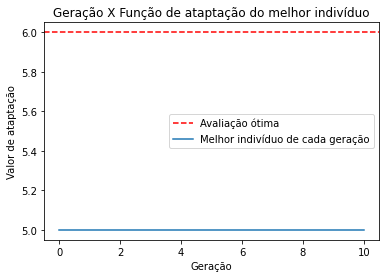

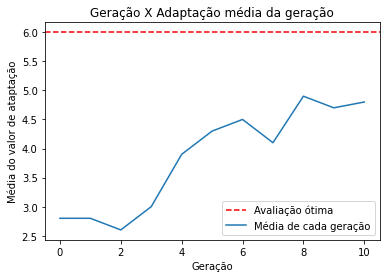

Melhor:  [3, 1, 0, 2] Adaptação =  5


In [ ]:
genetico(10,10,0.75,0.01,elitismo=True)